In [1]:
# Import libraries

from matplotlib.ticker import MultipleLocator, FixedLocator, LogLocator, NullFormatter, ScalarFormatter
from matplotlib.pyplot import MultipleLocator
from matplotlib import colors
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from datetime import date, datetime, time, timedelta
import os
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import time, datetime, pytz
import re
import matplotlib.font_manager
import statsmodels.api as sm


In [2]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'libertine'

In [3]:
file_path = "/Users/yzang/Documents/Slurm data/Clean data/"
slurm_data = pd.read_csv(file_path + "slurm_data_cleaned.csv", index_col = [0])
ml_data = pd.read_csv(file_path + "ml_data_cleaned.csv", index_col = [0])
generic_data = pd.read_csv(file_path + "generic_data_cleaned.csv", index_col = [0])
course_data = pd.read_csv(file_path + "course_data_cleaned.csv", index_col = [0])

In [4]:
# divide jobs into: generic completed, generic failed, ml completed, ml failed, course completed, and course failed

ge_completed = generic_data[generic_data['State'] == 'COMPLETED']
ge_failed = generic_data[generic_data['State'] == 'FAILED']
ml_completed = ml_data[ml_data['State'] == 'COMPLETED']
ml_failed = ml_data[ml_data['State'] == 'FAILED']
cs_completed = course_data[course_data['State'] == 'COMPLETED']
cs_failed = course_data[course_data['State'] == 'FAILED']


## Failure Rates by User

39.9617113691234


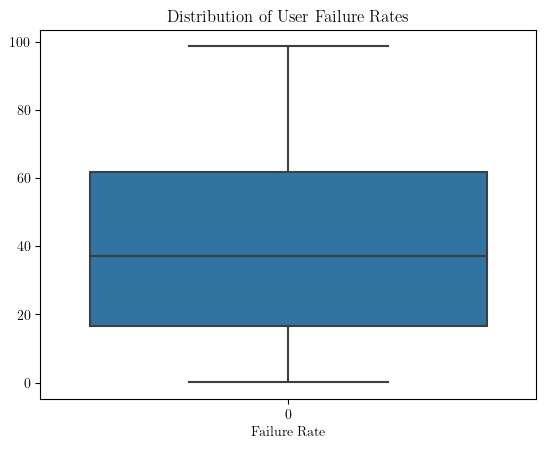

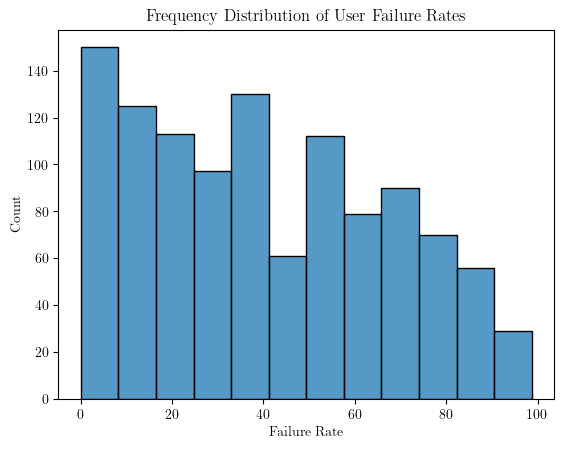

<Figure size 640x480 with 0 Axes>

In [11]:
# ToDo
# Generic

# filter the data to only include FAILED and COMPLETED jobs
# df2 = course_data.loc[course_data['State'].isin(['FAILED', 'COMPLETED'])]

# group the data by user and state
grouped = generic_data.groupby(['UID', 'State']).size().reset_index(name='count')

# pivot the data to create a table with user ids as rows, failed/completed as columns, and the count as values
pivot_table = grouped.pivot(index='UID', columns='State', values='count').reset_index()

# calculate the percentage of failed jobs for each user
pivot_table['failure_rate'] = pivot_table['FAILED'] / (pivot_table['COMPLETED'] + pivot_table['FAILED']) * 100

# calculate the mean and standard deviation of the failure rates
mean_failure_rate = pivot_table['failure_rate'].mean()
print(mean_failure_rate)
std_failure_rate = pivot_table['failure_rate'].std()

# create a box plot of the failure rates
sns.boxplot(data=pivot_table['failure_rate'])
plt.title('Distribution of User Failure Rates')
plt.xlabel('Failure Rate')
plt.show()#savefig FixMe
plt.savefig('fig-user-failure-rate-distribution-ge.png', bbox_inches = 'tight')


# create a histogram of the failure rates
sns.histplot(data=pivot_table['failure_rate'])
plt.title('Frequency Distribution of User Failure Rates')
plt.xlabel('Failure Rate')
plt.ylabel('Count')
plt.show()
plt.savefig('fig-user-failure-rate-distribution-freq-ge.png', bbox_inches = 'tight')



48.0974261959406


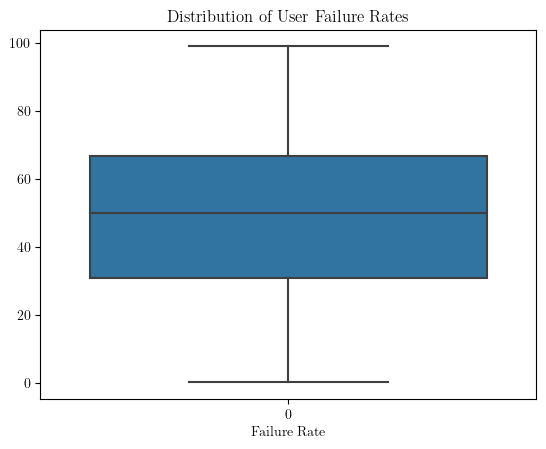

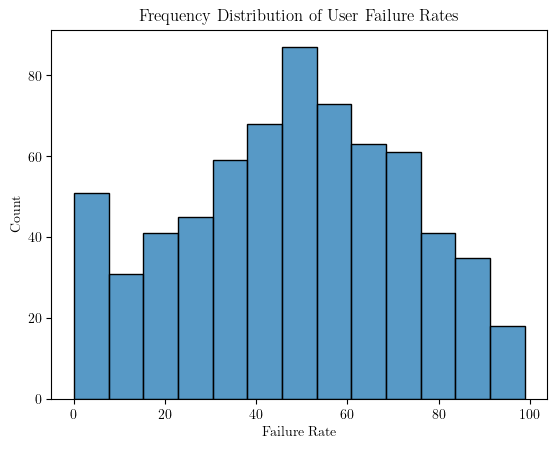

<Figure size 640x480 with 0 Axes>

In [12]:
# ToDo
# ML

# filter the data to only include FAILED and COMPLETED jobs
# df2 = course_data.loc[course_data['State'].isin(['FAILED', 'COMPLETED'])]

# group the data by user and state
grouped = ml_data.groupby(['UID', 'State']).size().reset_index(name='count')

# pivot the data to create a table with user ids as rows, failed/completed as columns, and the count as values
pivot_table = grouped.pivot(index='UID', columns='State', values='count').reset_index()

# calculate the percentage of failed jobs for each user
pivot_table['failure_rate'] = pivot_table['FAILED'] / (pivot_table['COMPLETED'] + pivot_table['FAILED']) * 100

# calculate the mean and standard deviation of the failure rates
mean_failure_rate = pivot_table['failure_rate'].mean()
print(mean_failure_rate)
std_failure_rate = pivot_table['failure_rate'].std()

# create a box plot of the failure rates
sns.boxplot(data=pivot_table['failure_rate'])
plt.title('Distribution of User Failure Rates')
plt.xlabel('Failure Rate')
plt.show()#savefig FixMe
plt.savefig('fig-user-failure-rate-distribution-ml.png', bbox_inches = 'tight')


# create a histogram of the failure rates
sns.histplot(data=pivot_table['failure_rate'])
plt.title('Frequency Distribution of User Failure Rates')
plt.xlabel('Failure Rate')
plt.ylabel('Count')
plt.show()
plt.savefig('fig-user-failure-rate-distribution-freq-ml.png', bbox_inches = 'tight')



55.749818276115064


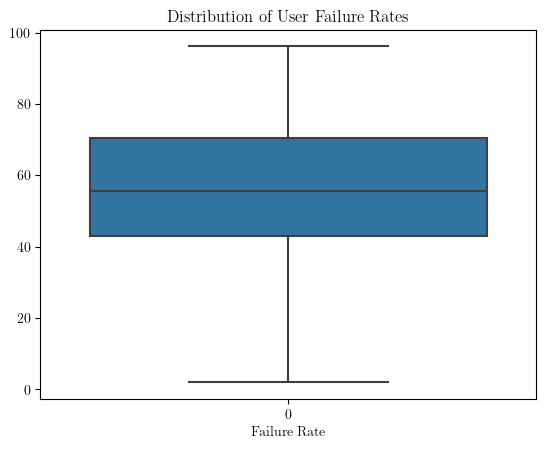

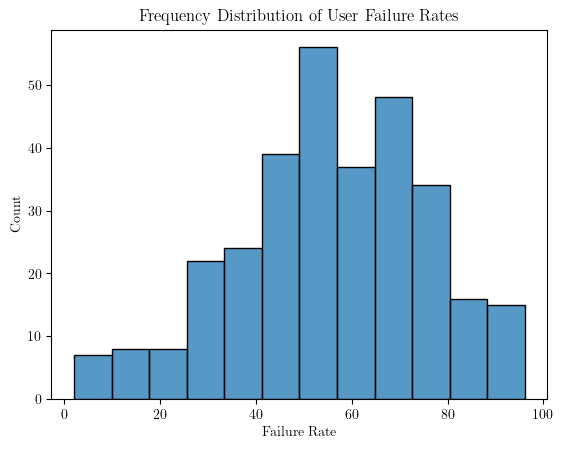

<Figure size 640x480 with 0 Axes>

In [14]:
# ToDo
# Course

# filter the data to only include FAILED and COMPLETED jobs
# df2 = course_data.loc[course_data['State'].isin(['FAILED', 'COMPLETED'])]

# group the data by user and state
grouped = course_data.groupby(['UID', 'State']).size().reset_index(name='count')

# pivot the data to create a table with user ids as rows, failed/completed as columns, and the count as values
pivot_table = grouped.pivot(index='UID', columns='State', values='count').reset_index()

# calculate the percentage of failed jobs for each user
pivot_table['failure_rate'] = pivot_table['FAILED'] / (pivot_table['COMPLETED'] + pivot_table['FAILED']) * 100

# calculate the mean and standard deviation of the failure rates
mean_failure_rate = pivot_table['failure_rate'].mean()
print(mean_failure_rate)
std_failure_rate = pivot_table['failure_rate'].std()

# create a box plot of the failure rates
sns.boxplot(data=pivot_table['failure_rate'])
plt.title('Distribution of User Failure Rates')
plt.xlabel('Failure Rate')
plt.show()#savefig FixMe
plt.savefig('fig-user-failure-rate-distribution-cs.png', bbox_inches = 'tight')


# create a histogram of the failure rates
sns.histplot(data=pivot_table['failure_rate'])
plt.title('Frequency Distribution of User Failure Rates')
plt.xlabel('Failure Rate')
plt.ylabel('Count')
plt.show()
plt.savefig('fig-user-failure-rate-distribution-freq-cs.png', bbox_inches = 'tight')



## Peak Analysis 2.0

In [9]:
df4 = slurm_data[slurm_data["State"] == "FAILED"]
df4 = df4[['Submit','node_type', 'running_time']]
df4['Submit'] = pd.to_datetime(df4['Submit'])
df4 = df4.sort_values(by = 'Submit')

ml_failure = df4[df4['node_type'] == 0]
ml_failure.drop('node_type', axis = 1, inplace = True)

ge_failure = df4[df4['node_type'] == 1]
ge_failure.drop('node_type', axis = 1, inplace = True)

all_failure = df4.drop('node_type', axis = 1)

/var/folders/_0/ckwc3nwj0cjbxyphnn5k3nl40000gp/T/ipykernel_28470/2985315870.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_failure.drop('node_type', axis = 1, inplace = True)
/var/folders/_0/ckwc3nwj0cjbxyphnn5k3nl40000gp/T/ipykernel_28470/2985315870.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ge_failure.drop('node_type', axis = 1, inplace = True)


In [10]:
# Resample the data at 10 minutes intervals and count the number of job submissions

def change_granularity(failure):
    modified_timestamps = failure['Submit'].dt.floor('1H')#ToDo: determine the time granularity 
    modified_timestamps.name = None

    grouped_data = modified_timestamps.groupby(modified_timestamps).count().reset_index()
    grouped_data.columns = ['Submit', 'count']
    
    series = pd.Series(grouped_data['count'].values, index = grouped_data['Submit'])
    return series


In [11]:
# ToDo: threshould value TBD
job_submission_rate_all = change_granularity(all_failure)
threshold_all = job_submission_rate_all.mean() + job_submission_rate_all.std() * 0.1

print(job_submission_rate_all.mean())
print(job_submission_rate_all.std())
print(threshold_all)

job_submission_rate_ge = change_granularity(ge_failure)

job_submission_rate_ml = change_granularity(ml_failure)


58.11207014659542
905.9274687078521
148.70481701738063


In [12]:
# Identify peaks

def get_peak(job_submission_rate):
    peak_list = []
    current_peak_start = None
    for i in range(len(job_submission_rate)):
        if job_submission_rate[i] > threshold_all:
            if current_peak_start is None:
                current_peak_start = job_submission_rate.index[i]
        else:
            if current_peak_start is not None:
                peak_list.append(current_peak_start)
                current_peak_start = None
    if current_peak_start is not None:
        peak_list.append(current_peak_start)
    
    return peak_list

peak_ge = get_peak(job_submission_rate_ge)
peak_ml = get_peak(job_submission_rate_ml)


In [13]:
# Generic jobs
failure_10t_ge = ge_failure
failure_10t_ge['submit_min'] = failure_10t_ge['Submit'].dt.floor('1H')#ToDo: determine the time granularit
peak_failure_10t_ge = failure_10t_ge.loc[failure_10t_ge['submit_min'].isin(peak_ge)]

# ML jobs
failure_10t_ml = ml_failure
failure_10t_ml['submit_min'] = failure_10t_ml['Submit'].dt.floor('1H')#ToDo: determine the time granularit
peak_failure_10t_ml = failure_10t_ml.loc[failure_10t_ml['submit_min'].isin(peak_ml)]

/var/folders/_0/ckwc3nwj0cjbxyphnn5k3nl40000gp/T/ipykernel_28470/1439471267.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failure_10t_ge['submit_min'] = failure_10t_ge['Submit'].dt.floor('1H')#ToDo: determine the time granularit
/var/folders/_0/ckwc3nwj0cjbxyphnn5k3nl40000gp/T/ipykernel_28470/1439471267.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failure_10t_ml['submit_min'] = failure_10t_ml['Submit'].dt.floor('1H')#ToDo: determine the time granularit


### Peak Duration

The smaller the frequency, the smaller the mean duration. 

10min

30min

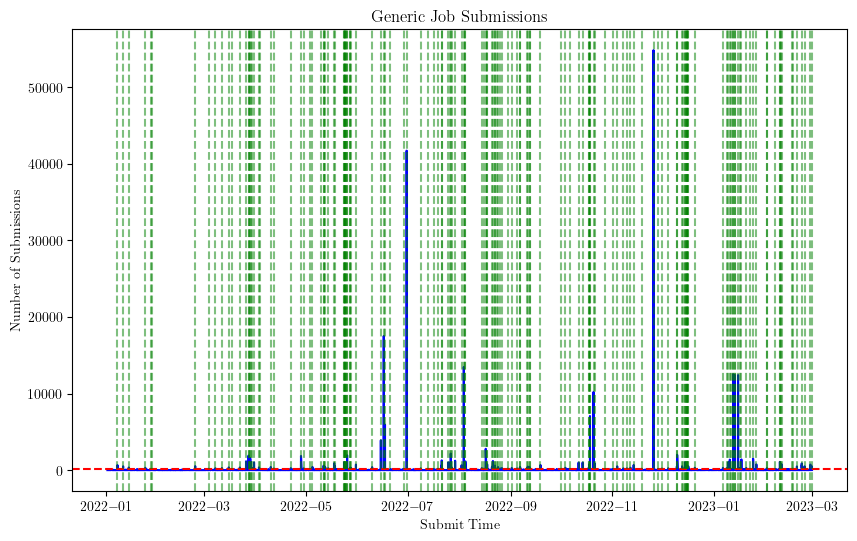

In [14]:
# Generic

# Create a line plot with threshold line
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(job_submission_rate_ge.index, job_submission_rate_ge.values, color='blue')
ax.axhline(y=threshold_all, color='red', linestyle='--')
for peak_start in peak_ge:
    ax.axvline(x=peak_start, color='green', linestyle='--', alpha=0.5)
ax.set_xlabel('Submit Time')
ax.set_ylabel('Number of Submissions')
ax.set_title('Generic Job Submissions')
plt.show()


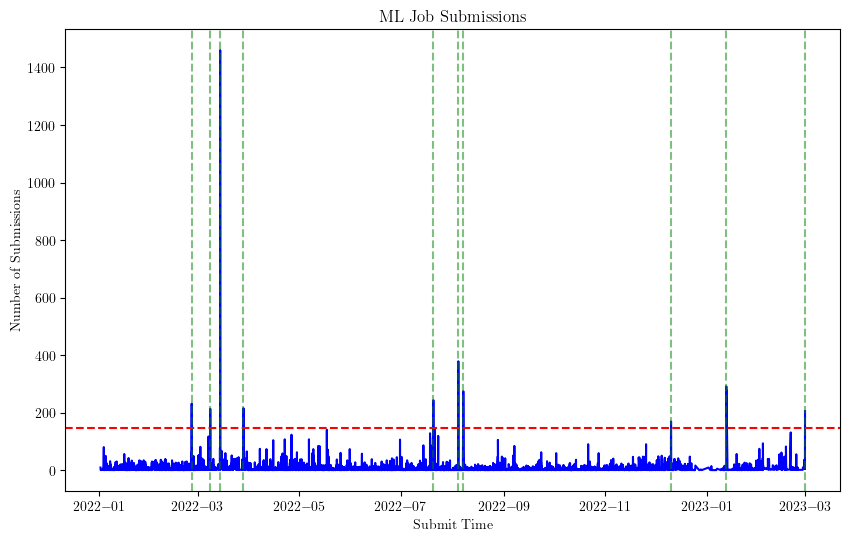

In [15]:
# ML

# Create a line plot with threshold line
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(job_submission_rate_ml.index, job_submission_rate_ml.values, color='blue')
ax.axhline(y=threshold_all, color='red', linestyle='--')
for peak_start in peak_ml:
    ax.axvline(x=peak_start, color='green', linestyle='--', alpha=0.5)
ax.set_xlabel('Submit Time')
ax.set_ylabel('Number of Submissions')
ax.set_title('ML Job Submissions')
plt.show()


In [15]:
def calc_mean_peak_duration(peak_list):
    # Initialize variables
    peak_durations = []
    current_period_start = peak_list[0]
    current_period_end = peak_list[0]

    # Iterate over the timestamps
    for i in range(1, len(peak_list)):
        diff = peak_list[i] - peak_list[i-1]
        if diff <= timedelta(minutes = 30):#ToDo: determine the time granularity
            # Timestamp belongs to the current peak period
            current_period_end = peak_list[i]
        else:
            # Timestamp belongs to a new peak period
            period_duration = current_period_end - current_period_start + timedelta(minutes = 10)#ToDo: determine the time granularity
            peak_durations.append(period_duration.total_seconds())
            current_period_start = peak_list[i]
            current_period_end = peak_list[i]
            
    # Calculate the mean value of peak periods in seconds
    mean_peak_duration = sum(peak_durations) / len(peak_durations)
        
#     print(len(peak_durations))#DeleteMe
      
    return mean_peak_duration

mean_peak_duration_ge = calc_mean_peak_duration(peak_ge)
print(f"Mean peak period duration of generic jobs is {mean_peak_duration_ge:.2f} seconds")

mean_peak_duration_ml = calc_mean_peak_duration(peak_ml)
print(f"Mean peak period duration of ML jobsis {mean_peak_duration_ml:.2f} seconds")


Mean peak period duration of generic jobs is 641.76 seconds
Mean peak period duration of ML jobsis 664.29 seconds


### Inter-Peak Time

In [16]:
# Create a list of peak periods

def extract_peak_periods(peak_list):
    peak_periods = []
    last_timestamp = None
    
    for timestamp in peak_list:
        if last_timestamp is None:
            # first timestamp is always a peak period
            peak_periods.append([timestamp])
        elif (timestamp - last_timestamp).seconds <= 1800: # 30 min #ToDo: determine the time granularity
            # timestamps are less than or equal to 30 minutes apart, so they belong to the same peak period
            peak_periods[-1].append(timestamp)
        else:
            # timestamps are more than 30 minutes apart, so this timestamp belongs to its own peak period
            peak_periods.append([timestamp])
        last_timestamp = timestamp
        
    return peak_periods
        

In [17]:
peak_periods_ge = extract_peak_periods(peak_ge)
peak_periods_ml = extract_peak_periods(peak_ml)

In [18]:
# Calculate the mean of inter-peak time

def process_peak_periods(peak_periods):
    modified_list = []

    for item in peak_periods:
        if isinstance(item, list) and len(item) == 1:
            modified_list.extend([item[0], item[0]])
        elif isinstance(item, list) and len(item) > 1:
            modified_list.extend([item[0], item[-1]])
        else:
            modified_list.append(item)
            
    # Calculate the intervals between peaks
    intervals = []
    
    for i in range(2, len(modified_list), 2):
        interval = modified_list[i] - modified_list[i-1]
        intervals.append(interval.total_seconds())

    # Calculate the mean interval
    mean_interval = sum(intervals) / len(intervals)
    
    return mean_interval

In [19]:
mean_inter_peak_ge = process_peak_periods(peak_periods_ge)
mean_inter_peak_ml = process_peak_periods(peak_periods_ml)

print(f"Mean inter-peak time of generic jobs is {mean_inter_peak_ge:.2f} seconds")
print(f"Mean inter-peak time of ML jobs is {mean_inter_peak_ml:.2f} seconds")


Mean inter-peak time of generic jobs is 132476.87 seconds
Mean inter-peak time of ML jobs is 1166355.56 seconds


### Inter-arrival Time of Failures During Peaks 

In [20]:
def calc_iat_peak(df):
    timestamps = df['Submit']
    
    # Calculate time differences between adjacent timestamps
    time_diffs = timestamps.diff()

    # Identify periods based on time difference exceeding 30 minutes
    periods = (time_diffs > pd.Timedelta(minutes = 30)).cumsum() #ToDo: determine the time granularity

    # Group timestamps by periods and extract individual periods
    result = timestamps.groupby(periods).apply(list)
    
    intervals = []
    num_intervals = 0

    for lst in result:
        for i in range(len(lst) - 1):
            interval = (lst[i+1] - lst[i]).total_seconds()
            intervals.append(interval)
            num_intervals += 1

    # Calculate mean interval
    mean_interval = sum(intervals) / num_intervals
    
    return mean_interval


In [21]:
mean_iat_peak_ge = calc_iat_peak(peak_failure_10t_ge)
mean_iat_peak_ml = calc_iat_peak(peak_failure_10t_ml)

print(f"Mean inter-arrival time of failed generic jobs during peaks is {mean_iat_peak_ge:.2f} seconds")
print(f"Mean inter-arrival time of failed ML jobs during peaks is {mean_iat_peak_ml:.2f} seconds")


Mean inter-arrival time of failed generic jobs during peaks is 0.23 seconds
Mean inter-arrival time of failed ML jobs during peaks is 1.40 seconds


### Failure Duration During Peaks

In [22]:
peak_failure_duration_ge = peak_failure_10t_ge['running_time'].mean()
print(f"Mean of Failure Duration during Peaks for Generic Jobs: {peak_failure_duration_ge:.2f} seconds")

peak_failure_duration_ml = peak_failure_10t_ml['running_time'].mean()
print(f"Mean of Failure Duration during Peaks for Generic Jobs: {peak_failure_duration_ml:.2f} seconds")

Mean of Failure Duration during Peaks for Generic Jobs: 195.02 seconds
Mean of Failure Duration during Peaks for Generic Jobs: 61.42 seconds


In [23]:
# slurm_data.info()

## Mean Time Between Failures

In [4]:
def calc_mtbf(df):
    timestamps = df['Submit']
    
    # Calculate time differences between failures
    time_diffs = timestamps.diff()

    # Calculate mean time between failures
    mean_time_between_failures = time_diffs.mean().total_seconds()
    
    return mean_time_between_failures


In [25]:
mtbf_ge = calc_mtbf(ge_failure)
mtbf_ml = calc_mtbf(ml_failure)

print(f"Mean time between failures for generic jobs is {mtbf_ge:.2f} seconds")
print(f"Mean time between failures for ML jobs during peaks is {mtbf_ml:.2f} seconds")


Mean time between failures for generic jobs is 103.46 seconds
Mean time between failures for ML jobs during peaks is 737.54 seconds


In [7]:
slurm_data['Submit'] = pd.to_datetime(slurm_data['Submit'])
all_failure = slurm_data[slurm_data['State'] == 'FAILED']
mtbf_all = calc_mtbf(all_failure)
print(f"Mean time between failures for all jobs is {mtbf_all:.2f} seconds")


Mean time between failures for all jobs is 86.23 seconds


In [8]:
len(slurm_data['JobID']) - slurm_data['JobID'].nunique()

160859

In [29]:
slurm_data['JobID'].nunique()

2264865

In [16]:
len(course_data) / len(ml_data)

0.19748063445223166